In [30]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## Notebook to create the model to deploy

In [31]:
data = pd.read_pickle("data/AgesAndHeights.pkl")
data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


<Axes: >

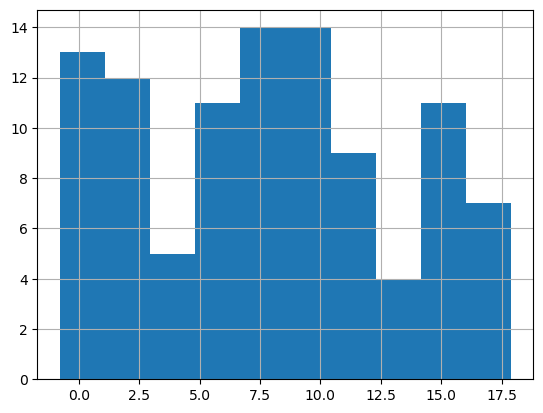

In [32]:
data['Age'].hist()

# Cleaning Data

#### Clean ages that are less than 0, like wtf

In [33]:
data[data['Age'] < 0]['Age'].count()

7

In [34]:
clean_data = data[data['Age'] > 0]
clean_data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

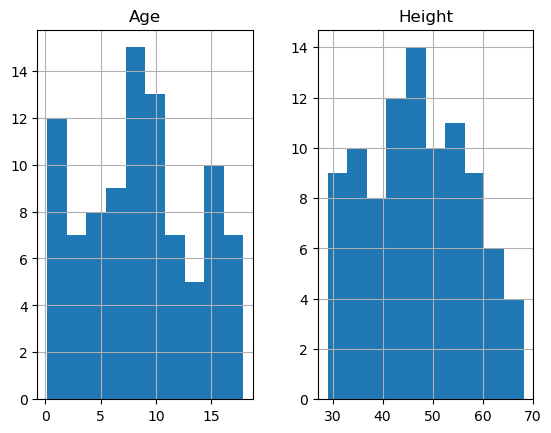

In [35]:
clean_data.hist()

#### Change Height units to metric

In [36]:
clean_data['Height'] = data['Height'].apply(lambda x: x*2.54)

#### Creating Model

<Axes: xlabel='Age', ylabel='Height'>

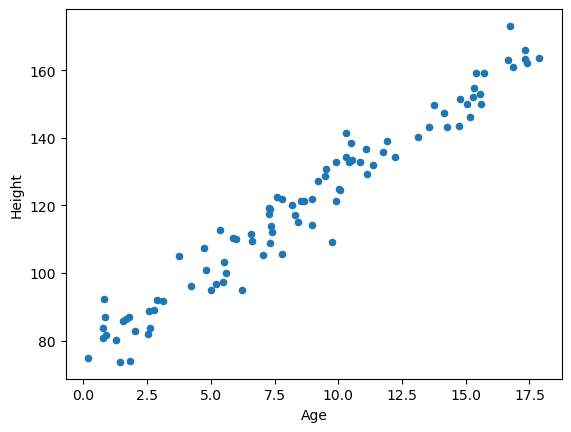

In [37]:
clean_data.plot.scatter(x='Age', y='Height')

In [38]:

fig = px.scatter(x=clean_data['Age'], y=clean_data['Height'], title="Height vs Age", labels={'x': 'Age (years)', 'y':'Height (cm)'})
fig

In [39]:
ages_np = clean_data['Age'].to_numpy()
heights_np = clean_data['Height'].to_numpy()

In [40]:
ages_np_reshape = ages_np.reshape(len(ages_np),1)
ages_np_reshape

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [41]:
model = LinearRegression().fit(ages_np_reshape, heights_np)
model.coef_


array([5.08359892])

#### Visualization

In [42]:
x_data_range = max(ages_np) - min(ages_np) +1 #Plus one to use with range func
x_data_range = np.array(range(round(x_data_range))) #Range to graph the linear regretion
predictions = model.predict(x_data_range.reshape(len(x_data_range),1)) #Predictions to graph



In [43]:
fig_with_model = px.scatter(x=clean_data['Age'], y=clean_data['Height'], title="Height vs Age", labels={'x': 'Age (years)', 'y':'Height (cm)'})

fig_with_model.add_trace(go.Scatter(x=x_data_range, y=predictions, mode='lines',name='Linear Regression'))
fig_with_model.show()

### Export Model With joblib

In [44]:
from joblib import dump, load

dump(model, 'model.joblib')

['model.joblib']

In [45]:
model_loaded = load('model.joblib')
model.predict(x_data_range.reshape(len(x_data_range),1))

array([ 76.10311834,  81.18671726,  86.27031619,  91.35391511,
        96.43751403, 101.52111296, 106.60471188, 111.6883108 ,
       116.77190973, 121.85550865, 126.93910757, 132.0227065 ,
       137.10630542, 142.18990434, 147.27350327, 152.35710219,
       157.44070111, 162.52430004, 167.60789896])

### Export visualization

In [46]:
def make_picture(training_data_filename, model, new_input, output_file):
    #Clean age and height data
    data = pd.read_pickle(training_data_filename)
    clean_data = data[data['Age'] > 0]
    clean_data
    clean_data['Height'] = data['Height'].apply(lambda x: x*2.54)

    #Create numpy arrays to use with scikit
    ages_np = clean_data['Age'].to_numpy()
    heights_np = clean_data['Height'].to_numpy()

    #Predict with the model given as a parameter
    x_data_range = max(ages_np) - min(ages_np) +1 #Plus one to use with range func
    x_data_range = np.array(range(round(x_data_range))) #Range to graph the linear regretion
    predictions = model.predict(x_data_range.reshape(len(x_data_range),1)) #Predictions to graph


    #Create graph
    fig = px.scatter(x=clean_data['Age'], y=clean_data['Height'], title="Height vs Age", labels={'x': 'Age (years)', 'y':'Height (cm)'})
    fig.add_trace(go.Scatter(x=x_data_range, y=predictions, mode='lines',name='Linear Regression'))


    #Add user input
    new_predictions = model.predict(new_input.reshape(len(new_input),1))
    fig.add_trace(go.Scatter(x=new_input, y=new_predictions,name="New outputs", mode='markers', marker=dict(color='purple', size=8,line=dict(color='purple',width=2))))
    
    fig.write_image(output_file, width=800)
    fig.show()


make_picture('data/AgesAndHeights.pkl', model_loaded, np.array([1, 17]), '../static/graph.svg')
